# Programming with Python

Tutors: Drazen Petrov (drazen.petrov@boku.ac.at) & Yerko Escalona (yerko.escalona@boku.ac.at)

## Lecture 8

Overview:

- Scipy
- Matplotlib


- some extras

## Scipy package - data analysis

SciPy is organized into subpackages covering different scientific computing domains. These are summarized in the following table:

|Subpackage|Description|
|:--- |--- |
|**cluster**|Clustering algorithms|
|**constants**|Physical and mathematical constants|
|**fftpack**|Fast Fourier Transform routines|
|**integrate**|Integration and ordinary differential equation solvers|
|**interpolate**|Interpolation and smoothing splines|
|**io**|Input and Output|
|**linalg**|Linear algebra|
|**ndimage**|N-dimensional image processing|
|**odr**|Orthogonal distance regression|
|**optimize**|Optimization and root-finding routines|
|**signal**|Signal processing|
|**sparse**|Sparse matrices and associated routines|
|**spatial**|Spatial data structures and algorithms|
|**special**|Special functions|
|**stats**|Statistical distributions and functions|



For convenience, let's import important packages first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

It is recommendend to import sub-packages separately. For example:

In [2]:
from scipy import integrate

### Integration

In [3]:
help(integrate.trapz)

Help on function trapz in module scipy.integrate._quadrature:

trapz(y, x=None, dx=1.0, axis=-1)
    `An alias of `trapezoid`.
    
    `trapz` is kept for backwards compatibility. For new code, prefer
    `trapezoid` instead.



If you require more information:

*Example*: 
\begin{align}
\int^{10}_{-10} x^3 + 4x^2 -11x + 4 &=  \frac{1}{4}x^4 + \frac{4}{3}x^3 - \frac{11}{2}x^2 + 4x \Big|^{10}_{-10} \\
&= 2746.\overline{6}
\end{align}

In [4]:
# check the result (analytical)
def get_int_f(x):
    return 1/4 * x**4 + 4/3 * x**3 - 11/2 * x**2 + 4*x

get_int_f(10) - get_int_f(-10)

2746.666666666666

#### Integration given fixed sample

In [5]:
from scipy.integrate import trapz,simps

def polynomial_function(x):
    return x*x*x + 4*x*x - 11*x + 4

x = np.linspace(-10,10,21)
y = polynomial_function(x)

plt.plot(x,y, 'o')
plt.show() 

In [6]:
print("Integration using the trapezoidal rule:", trapz(y, x))
print("Integration using the Simpson's rule", simps(y, x)) # generally more precise

Integration using the trapezoidal rule: 2760.0
Integration using the Simpson's rule 2746.6666666666665


## Example problem: signal integration

In [7]:
#generate data (signal measurement and blank/baseline)
np.random.seed(1)
def gaussian(x, mu, sig, height = 1.):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) * height

x = np.linspace(0, 30, 151)

baseline_y = 0.3
blank = np.random.rand(x.shape[0]) * 0.1 + baseline_y

baseline_experimant = np.random.rand(x.shape[0]) * 0.1 + baseline_y
signals = ((4, 1.), (13, 1.2), (22, .5)) # mu, sigma of the gaussian
y = baseline_experimant
for mu, sig in signals:
    y += gaussian(x, mu, sig)

y += np.random.rand(len(x)) * 0.1 * y # add some experimental noise

In [8]:
from matplotlib import pyplot as plt

fig_dpi = 100
plt.figure(dpi = fig_dpi)
plt.plot(x, y, label = 'signal', c = 'k')
plt.xlabel('measuring time / space')
plt.ylabel('measured intensity / absorbtion')
plt.ylim(0)
plt.plot(x, blank, label = 'blank', c = '0.7')
plt.legend()
plt.show()

### set colors
https://matplotlib.org/2.0.2/users/colormaps.html

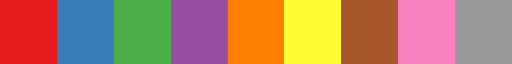

In [9]:
# color map
from matplotlib.cm import get_cmap
cmap = get_cmap('Set1')
#cmap = get_cmap('tab10') # default color map
cols = cmap.colors # this is a list of the colors below
cmap


#### highlight the peaks
`plt.axvspan`
`plt.axhspan`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhspan.html

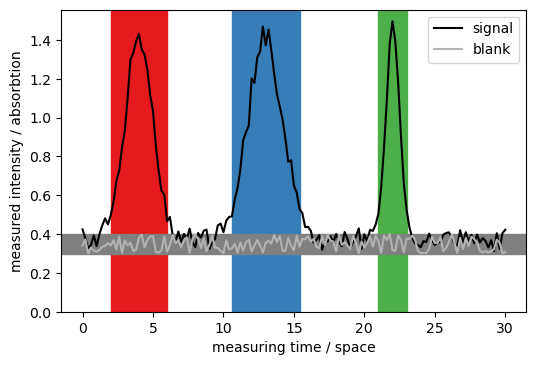

In [10]:
from matplotlib import pyplot as plt

# same as above
plt.figure(dpi = fig_dpi)
plt.plot(x, y, label = 'signal', c = 'k')
plt.xlabel('measuring time / space')
plt.ylabel('measured intensity / absorbtion')
plt.ylim(0)
plt.plot(x, blank, label = 'blank', c = '0.7')
plt.legend()
# same as above

# additional code
for i, peak_param in enumerate(signals):
    mu, sig = peak_param[0:2]
    plt.axvspan(mu - 2*sig, mu + 2*sig, color = cols[i])
    #plt.axvspan(mu - 2*sig, mu + 2*sig, color = "C"+str(i))

plt.axhspan(blank.min(), blank.max(), color = '0.5')
# additional code

plt.show()


#### add text
`plt.text`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

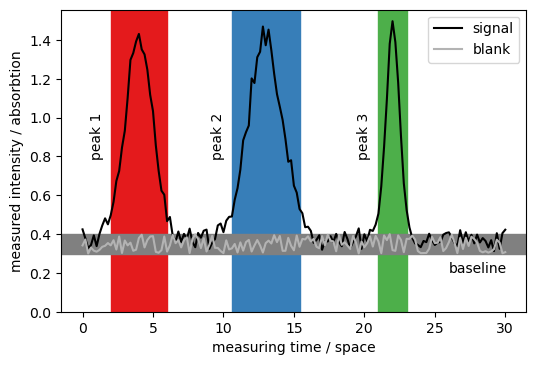

In [11]:
from matplotlib import pyplot as plt

# same as above
plt.figure(dpi = fig_dpi)
plt.plot(x, y, label = 'signal', c = 'k')
plt.xlabel('measuring time / space')
plt.ylabel('measured intensity / absorbtion')
plt.ylim(0)
plt.plot(x, blank, label = 'blank', c = '0.7')
plt.legend()

for i, peak_param in enumerate(signals):
    mu, sig = peak_param[0:2]
    plt.axvspan(mu - 2*sig, mu + 2*sig, color = cols[i])

plt.axhspan(blank.min(), blank.max(), color = '0.5')
# same as above

# additional code
for i, peak_param in enumerate(signals):
    mu, sig = peak_param[0:2]
    plt.text(mu - 2*sig - 1.5, 0.8, 'peak ' + str(i + 1), rotation = 90) # xposition, yposition, text

plt.text(26, 0.2, 'baseline') # xposition, yposition, text
# additional code

plt.show()


#### horizontal / vertical line
`plt.axvline`
`plt.axhline`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
#### annotate
`plt.annotate`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

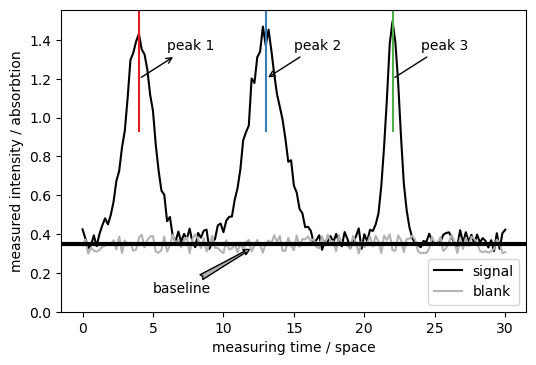

In [12]:
from matplotlib import pyplot as plt

# same as above
plt.figure(dpi = fig_dpi)
plt.plot(x, y, label = 'signal', c = 'k')
plt.xlabel('measuring time / space')
plt.ylabel('measured intensity / absorbtion')
plt.ylim(0)
plt.plot(x, blank, label = 'blank', c = '0.7')
plt.legend(loc = 4)
# same as above

# additional code
# add vertical lines
for i, peak_param in enumerate(signals):
    mu, sig = peak_param[0:2]
    plt.axvline(mu, ymin = 0.6, c = cols[i]) # mu defines x value of the line
    # ymin/ymax are in units of the whole plot (0.9 means of the whole y range - i.e. 90 % of the y range)

# add horizontal line
plt.axhline(blank.mean(), c = '0.', linewidth=3) # y value of the line is equal to blank.mean()

# add annotations with arrows
# signal
arrow_styles = ['<-', '->', '-']
for i, peak_param in enumerate(signals):
    mu, sig = peak_param[0:2]
    arrow_prop = dict(arrowstyle=arrow_styles[i])
    plt.annotate('peak ' + str(i+1), (mu, 1.2), xytext= (mu+2, 1.35), arrowprops = arrow_prop)

# blank
arrow_prop = {'arrowstyle':'fancy', 'edgecolor':'k', 'facecolor':'0.7'}
plt.annotate('baseline', (12, blank.mean() - 0.02), xytext= (5, 0.1), arrowprops = arrow_prop)
# additional code

plt.show()


#### integrate the peaks and write the result on the plot

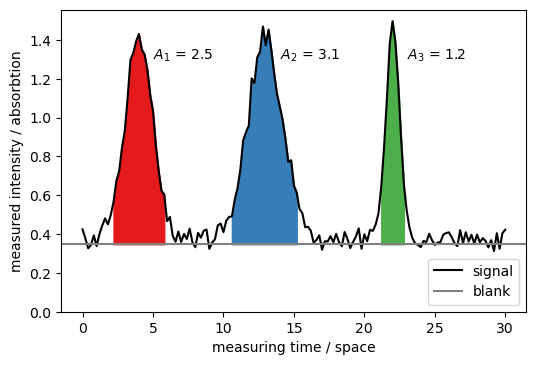

In [13]:
from matplotlib import pyplot as plt

# same as above
plt.figure(dpi = fig_dpi)
plt.plot(x, y, label = 'signal', c = 'k')
plt.xlabel('measuring time / space')
plt.ylabel('measured intensity / absorbtion')
plt.ylim(0)
# only average
plt.axhline(blank.mean(), c = '0.5', label = 'blank') # y value of the line is equal to blank.mean()
plt.legend(loc = 4)
# same as above

# additional code
for i, peak_param in enumerate(signals):
    mu, sig = peak_param[0:2]
    integral_range = (mu - 2*sig < x) * (x < mu + 2*sig)
    x_to_integrate = x[integral_range]
    y_to_integrate = y[integral_range]
    # highlight the integral area
    plt.fill_between(x_to_integrate, y_to_integrate, blank.mean(), color = cols[i])
    result = simps(y_to_integrate - blank.mean(), x_to_integrate) # calculate the integral
    plt.text(mu + 1, 1.3, '$A_{:}$ = {:.1f}'.format(i+1, result)) # xposition, yposition, text

# additional code
plt.show()

### Linear fit

In [14]:
# generate data
np.random.seed(1)
def lin_f(x):
    return 1.2*x + 3.4

x = np.linspace(-5,5,30)
y = lin_f(x) + np.random.random(30) * 6. # adding noise to each point

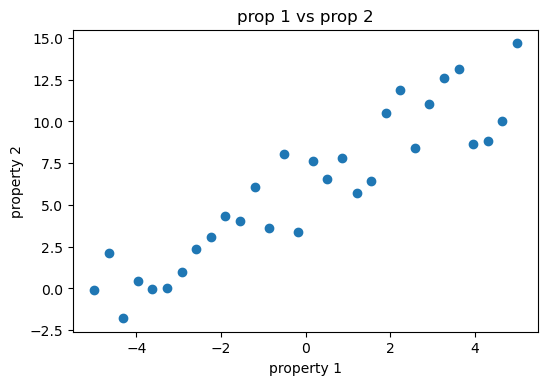

In [15]:
# plot
plt.figure(dpi = fig_dpi)
plt.title('prop 1 vs prop 2')
plt.scatter(x,y)
plt.xlabel('property 1')
plt.ylabel('property 2')
plt.show()

In [16]:
# import statements
from scipy import stats
from scipy.stats import spearmanr, pearsonr, linregress

In [17]:
res_lin_reg = linregress(x,y)
print(res_lin_reg)

LinregressResult(slope=1.3499870944940728, intercept=6.012687122449287, rvalue=0.9173481809981128, pvalue=1.0200232343846011e-12, stderr=0.11071159251121325, intercept_stderr=0.33043369194477124)


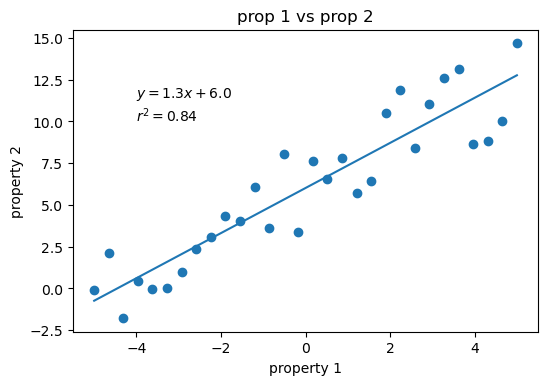

In [18]:
# plot
# same as before
plt.figure(dpi = fig_dpi)
plt.title('prop 1 vs prop 2')
plt.scatter(x,y)
plt.xlabel('property 1')
plt.ylabel('property 2')
# same as before

#additional code
y_fit = x * res_lin_reg.slope + res_lin_reg.intercept # get the regression line
plt.plot(x, y_fit)
params_of_interest = res_lin_reg.slope, res_lin_reg.intercept, res_lin_reg.rvalue**2
line1 = '$y = {:.1f}x + {:.1f}$'
line2 = '$r^2 = {:.2f}$'
template_text = line1 + '\n' + line2
plt.text(-4, 10, template_text.format(*params_of_interest))
#additional code

plt.show()

In [19]:
pearsonr(x,y)

(0.9173481809981128, 1.0200232343846011e-12)

In [20]:
spearmanr(x,y)

SpearmanrResult(correlation=0.9305895439377085, pvalue=9.61878047778942e-14)

## Curve fit
### Linear fit using curve fit

In [21]:
from scipy.optimize import curve_fit

In [22]:
def f_fit(x, a, b): # define a functional form to fit to (here, linear function)
    return a*x + b

popt, pcov = curve_fit(f_fit, x, y)
# optimal parameters, covariance of covariance of popt
a, b = popt
print(a, b)

1.3499870922032933 6.012687118798719


In [23]:
print(res_lin_reg.slope, res_lin_reg.intercept)

1.3499870944940728 6.012687122449287


In [24]:
plt.figure(dpi = fig_dpi)
plt.scatter(x,y)
y_fit = f_fit(x, a, b) # same as x * a + b
plt.plot(x, y_fit)
plt.show()

## Example problem: Michaelis–Menten kinetics
https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics

$$v={\frac {V_{\max }{[{{S}}]}}{K_{\mathrm {M} }+[{{S}}]}}$$


In [25]:
#generate data
np.random.seed(0)

actual_Vm = 10
actual_Km = 50

def model(x, Vm, Km): # function to fit to
    return Vm*x/(x + Km)


x = np.array([1, 10, 20, 50, 100, 200, 400])
n = len(x)
y = model(x, actual_Vm, actual_Km) +  np.random.normal(0, 0.3, n)

In [26]:
# fit the data to the "model" function
Vm0, Km0 = 1,1 
popt, pcov = curve_fit(model, x, y, p0=[Vm0, Km0]) # p0 - the initial guess of the parameters
Vm, Km = popt
Vm_2 = Vm / 2
print(Vm, Km)

9.837616426718682 40.06268942271458


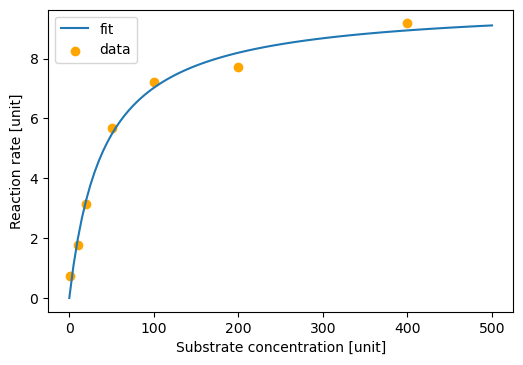

In [27]:
# simple plot
xl = np.linspace(0, 500, 101)
Vm, Km = popt
Vm_2 = Vm / 2
yl = model(xl, Vm, Km)

plt.figure(dpi = fig_dpi)
plt.scatter(x, y, color="orange", label="data")
plt.plot(xl, yl, label="fit")
plt.xlabel("Substrate concentration [unit]")
plt.ylabel("Reaction rate [unit]")
plt.legend()
plt.show()


### nicer plot

#### horizontal / vertical line (option 2)
`plt.vlines`
`plt.hlines`

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html

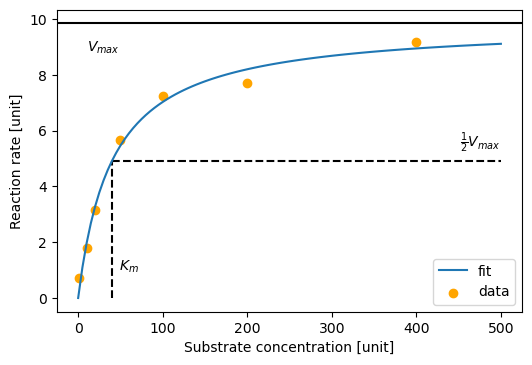

In [28]:
# same as before
plt.figure(dpi = fig_dpi)
plt.scatter(x, y, color="orange", label="data")
plt.plot(xl, yl, label="fit")
plt.xlabel("Substrate concentration [unit]")
plt.ylabel("Reaction rate [unit]")
plt.legend()
# same as before

#additional code
plt.axhline(Vm, c = 'k')
plt.hlines(Vm / 2, Km, 500, linestyles='--', color = 'k') # x value, ymin, ymax (but in true y units)
plt.vlines(Km, 0, Vm_2, linestyles='--', color = 'k')# y value, xmin, xmax (but in true y units)


plt.text(10, Vm * 0.9, '$V_{max}$')
plt.text(500, Vm_2 * 1.1, r'$\frac{1}{2} V_{max}$', ha='right')
plt.text(Km * 1.2, 0.1 * Vm, '$K_m$')
#additional code

plt.show()

### Statistical tests

In [29]:
# generate data
np.random.seed(0)
heights = stats.norm.rvs(loc = 180, scale = 4, size=1000) # sample from normal distribution
heights_2 = stats.norm.rvs(loc = 160, scale = 5, size=1000) # sample from normal distribution

In [30]:
print('first sample')
print("min:", heights.min())   # equivalent to np.min(x)
print("max:", heights.max())   # equivalent to np.max(x)
print("mean:", heights.mean())  # equivalent to np.mean(x)
print("var:", heights.var())   # equivalent to np.var(x))
print('\nsecond sample')
print("min:", heights_2.min())   # equivalent to np.min(x)
print("max:", heights_2.max())   # equivalent to np.max(x)
print("mean:", heights_2.mean())  # equivalent to np.mean(x)
print("var:", heights_2.var())   # equivalent to np.var(x))

first sample
min: 167.8154277808003
max: 191.03742045608632
mean: 179.81897317003921
var: 15.587751300994467

second sample
min: 145.0269356988619
max: 175.8548738664509
mean: 160.0680847015808
var: 23.43334385706949


In [31]:
print(stats.describe(heights))
print('\n')
print(stats.describe(heights_2))

DescribeResult(nobs=1000, minmax=(167.8154277808003, 191.03742045608632), mean=179.81897317003921, variance=15.603354655650117, skewness=0.03385895323566073, kurtosis=-0.0467663244783294)


DescribeResult(nobs=1000, minmax=(145.0269356988619, 175.8548738664509), mean=160.0680847015808, variance=23.45680065772722, skewness=0.05564722297474902, kurtosis=-0.10745402808912452)


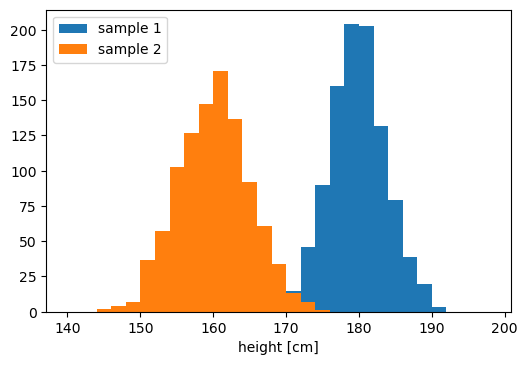

In [32]:
plt.figure(dpi = fig_dpi)
plt.hist(heights, bins=np.arange(140,200,2), label='sample 1')
plt.hist(heights_2, bins=np.arange(140,200,2), label='sample 2')
plt.xlabel('height [cm]')
plt.legend(loc = 2)
plt.show()

`ttest_ind` Calculate the T-test for the means of two independent samples of scores.<br/>
If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.<br/> If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [33]:
print(stats.ttest_ind(heights, heights_2)) # different
print(stats.ttest_ind(heights, heights)) # same
print(stats.ttest_ind(heights_2, heights_2)) # same

Ttest_indResult(statistic=99.93546870282597, pvalue=0.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)


### Example problem: protein expression

In [135]:
# generate data
N_samples = 5
N_proteins = 3
N_conditions = 4
np.random.seed(1)

ref_cond_mean_expression = np.array([8, 15, 6]) # for each protein

# get the differences form the ref condition for each protein
# max difference (amplitude of the difference) for each of the proteins (random number from -2.5 to 2.5)
max_offset = np.random.rand(N_proteins) * 5 - 2.5
print('max differences for each protein')
print(max_offset)


max differences for each protein
[-0.41488998  1.10162247 -2.49942813]


In [136]:
offsets = np.random.rand(N_proteins, N_conditions - 1) # for each protein, for each condition (except the ref)
offsets *= max_offset[:, None] # multiply each condition and protein, with max difference for each protein
other_cond_mean_expression = offsets + ref_cond_mean_expression[:, None]
mean_expressions = np.vstack([ref_cond_mean_expression, other_cond_mean_expression.T]).T
mean_expressions

array([[ 8.        ,  7.87456525,  7.93911245,  7.96168964],
       [15.        , 15.20518843, 15.38067746, 15.43708796],
       [ 6.        ,  4.6532663 ,  4.95225344,  4.28734311]])

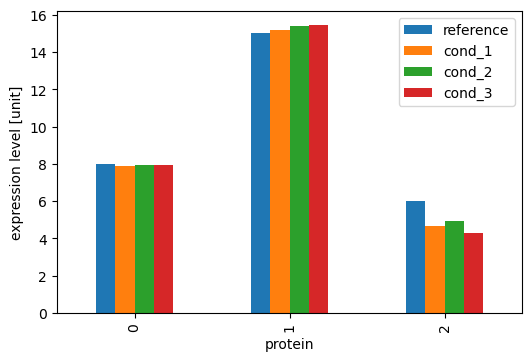

In [137]:
# let's look at the generated data
condition_names = ['cond_'+str(i) for i in range(N_conditions)]
condition_names[0] = 'reference'

fig = plt.figure(dpi = fig_dpi)
df = pd.DataFrame(mean_expressions, columns = condition_names)
df.plot.bar(ax=fig.add_subplot())
plt.xlabel('protein')
plt.ylabel('expression level [unit]')
plt.show()


In [138]:
# let's genereta experimental data (5 samples for each protein and each condition)
# by adding some noise to the mean_expressions array

# generating the noise
noise_level = np.random.rand(N_proteins) * 4. - 2. # for each protein (random number in range +- 2)
noise = np.random.rand(N_proteins, N_conditions, N_samples)
noise *= noise_level[:, None, None] # multiply each experiment with the noise_level for each specific protein

# addition to mean_expressions
experimental_data = mean_expressions[:,:,None] + noise

In [139]:
mean = experimental_data.mean(axis=2)


df = pd.DataFrame(experimental_data.mean(axis=2), columns = condition_names)

df['protein'] = ['ABC1', 'DEF2', 'GHI3'] # some made-up protein names
df = df.set_index('protein')
df

reference     cond_1     cond_2     cond_3
protein                                            
ABC1      7.530682   7.011296   7.450471   7.322742
DEF2     15.788019  16.085439  16.006207  15.941330
GHI3      5.219897   4.019995   3.725076   3.385515

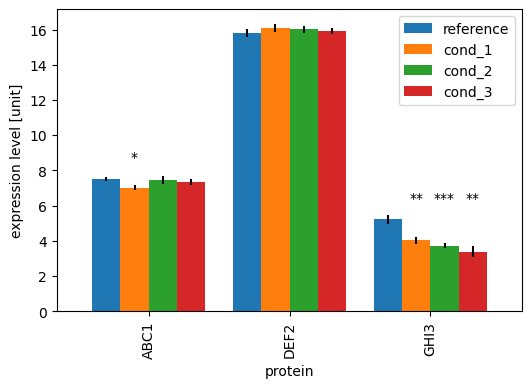

In [140]:
SEM = stats.sem(experimental_data, axis=2)

fig, ax = plt.subplots(1,1, dpi = fig_dpi)
single_bar_width = 0.2
df.plot.bar(yerr=SEM.T, width = single_bar_width * N_conditions, ax = ax)

for i in range(N_proteins):
    #print('\n\t\tprot', i)
    for j in range(N_conditions - 1):
        #print('\tcond', j+1)
        p_value = stats.ttest_ind(experimental_data[i,0], experimental_data[i,j+1]).pvalue # t test
        sig = None
        if p_value <= 0.001:
            sig = '***'
        elif p_value <= 0.01:
            sig = '**'
        elif p_value <= 0.05:
            sig = '*'
        if sig:
            pos_x = i + single_bar_width * (- N_conditions / 2 + 3/2 + j)
            pos_y = df.iloc[i, 0] + 1
            ax.text(pos_x, pos_y, sig, ha='center')

#plt.xlabel('protein')
plt.ylabel('expression level [unit]')
plt.show()

### Example problem: effect of the sample size
we generate 2 random sample from 2 normal distributions (centered around 180 and 170)

depending on the sample size, p value of the t test changes drastically

In [40]:
np.random.seed(0)
sample_sizes = [100, 50, 25, 10]


fig, ax = plt.subplots(4,2, sharex='col', dpi = 100)
for i in range(4):
    heights = stats.norm.rvs(loc = 180, scale = 10, size=sample_sizes[i]) # sample from normal distribution
    heights_2 = stats.norm.rvs(loc = 170, scale = 10, size=sample_sizes[i]) # sample from normal distribution
    ax[i][0].hist(heights, bins=np.arange(140,210,2), label='sample 1')
    ax[i][0].hist(heights_2, bins=np.arange(140,210,2), label='sample 2')
    p_value = stats.ttest_ind(heights, heights_2).pvalue
    ax[i][1].bar([1],[heights.mean()], yerr=[stats.sem(heights)])
    ax[i][1].bar([2],[heights_2.mean()], yerr=[stats.sem(heights_2)])
    ax[i][1].set_ylim(165, 190)
    ax[i][1].set_xticks([1,2])
    ax[i][1].text(1.7, 188, 'N = {:}\np = {:.4f}'.format(sample_sizes[i], p_value), va = 'top')
plt.tight_layout()
plt.show()

# BREAK

### Some additional pandas functionality

In [41]:
%%writefile country_data.csv
country,population,capital,flag_col,size_km2,islands
Austria,8902600,Vienna,2,83879,0
Germany,83149300,Berlin,3,357386,50
Croatia,4076246,Zagreb,3,56594,718
Chile,17574003,Santiago,3,756950,134
Brazil,210147125,Brasilia,3,8515767,21
Venezuela,28887118,Caracas,3,916445,300

Overwriting country_data.csv


In [42]:
df_country = pd.read_csv("country_data.csv", delimiter=",", index_col=0)
df = df_country.copy()
df

population   capital  flag_col  size_km2  islands
country                                                     
Austria       8902600    Vienna         2     83879        0
Germany      83149300    Berlin         3    357386       50
Croatia       4076246    Zagreb         3     56594      718
Chile        17574003  Santiago         3    756950      134
Brazil      210147125  Brasilia         3   8515767       21
Venezuela    28887118   Caracas         3    916445      300

In [43]:
df_data1 = df.iloc[:,:2].reset_index()
df_data1

country  population   capital
0    Austria     8902600    Vienna
1    Germany    83149300    Berlin
2    Croatia     4076246    Zagreb
3      Chile    17574003  Santiago
4     Brazil   210147125  Brasilia
5  Venezuela    28887118   Caracas

In [44]:
df_data2 = df.iloc[:,2:][::-1].reset_index()
df_data2

country  flag_col  size_km2  islands
0  Venezuela         3    916445      300
1     Brazil         3   8515767       21
2      Chile         3    756950      134
3    Croatia         3     56594      718
4    Germany         3    357386       50
5    Austria         2     83879        0

In [45]:
pd.concat([df_data1, df_data2], axis = 1) # not what we wanted...

country  population   capital    country  flag_col  size_km2  islands
0    Austria     8902600    Vienna  Venezuela         3    916445      300
1    Germany    83149300    Berlin     Brazil         3   8515767       21
2    Croatia     4076246    Zagreb      Chile         3    756950      134
3      Chile    17574003  Santiago    Croatia         3     56594      718
4     Brazil   210147125  Brasilia    Germany         3    357386       50
5  Venezuela    28887118   Caracas    Austria         2     83879        0

### merge (join)

In [46]:
pd.merge(df_data1, df_data2, on='country') # better :)
#pd.merge(df_data1, df_data2, left_on='country', right_on='country') # if column names are not the same

country  population   capital  flag_col  size_km2  islands
0    Austria     8902600    Vienna         2     83879        0
1    Germany    83149300    Berlin         3    357386       50
2    Croatia     4076246    Zagreb         3     56594      718
3      Chile    17574003  Santiago         3    756950      134
4     Brazil   210147125  Brasilia         3   8515767       21
5  Venezuela    28887118   Caracas         3    916445      300

In [47]:
df_islands = df[['islands']].iloc[1:,:] # only countries with islands...
df_islands

islands
country           
Germany         50
Croatia        718
Chile          134
Brazil          21
Venezuela      300

In [48]:
df_population = df[['population']].iloc[:-1,:] # for some reason, there is no data for Venezuela
df_population

population
country            
Austria     8902600
Germany    83149300
Croatia     4076246
Chile      17574003
Brazil    210147125

#### merge using left, right, inner and outer

In [49]:
df_new = pd.merge(df_population, df_islands, on='country', how='left') # all countries from the left DataFrame
df_new

population  islands
country                     
Austria     8902600      NaN
Germany    83149300     50.0
Croatia     4076246    718.0
Chile      17574003    134.0
Brazil    210147125     21.0

In [50]:
df_new = pd.merge(df_population, df_islands, on='country', how='right') # all countries from the right DataFrame
df_new

population  islands
country                        
Germany     83149300.0       50
Croatia      4076246.0      718
Chile       17574003.0      134
Brazil     210147125.0       21
Venezuela          NaN      300

In [51]:
df_new = pd.merge(df_population, df_islands, on='country', how='outer') # all countries from the both DataFrames
df_new

population  islands
country                        
Austria      8902600.0      NaN
Germany     83149300.0     50.0
Croatia      4076246.0    718.0
Chile       17574003.0    134.0
Brazil     210147125.0     21.0
Venezuela          NaN    300.0

In [52]:
df_new = pd.merge(df_population, df_islands, on='country', how='inner') # countries present in both DataFrame
df_new

population  islands
country                     
Germany    83149300       50
Croatia     4076246      718
Chile      17574003      134
Brazil    210147125       21

### missing data

In [53]:
%%writefile country_data_missing.csv
country,population,capital,flag_col,size_km2,islands
Austria,8902600,Vienna,2,83879,
Germany,83149300,Berlin,3,357386,50
Croatia,4076246,Zagreb,,56594,718
Chile,17574003,Santiago,3,756950,134
Brazil,,Brasilia,,8515767,21
Venezuela,28887118,Caracas,,916445,300

Overwriting country_data_missing.csv


In [54]:
df_country_missing = pd.read_csv("country_data_missing.csv", delimiter=",", index_col=0)
df = df_country_missing.copy()
df

population   capital  flag_col  size_km2  islands
country                                                     
Austria     8902600.0    Vienna       2.0     83879      NaN
Germany    83149300.0    Berlin       3.0    357386     50.0
Croatia     4076246.0    Zagreb       NaN     56594    718.0
Chile      17574003.0  Santiago       3.0    756950    134.0
Brazil            NaN  Brasilia       NaN   8515767     21.0
Venezuela  28887118.0   Caracas       NaN    916445    300.0

In [55]:
df.isna()

population  capital  flag_col  size_km2  islands
country                                                    
Austria         False    False     False     False     True
Germany         False    False     False     False    False
Croatia         False    False      True     False    False
Chile           False    False     False     False    False
Brazil           True    False      True     False    False
Venezuela       False    False      True     False    False

In [56]:
df.notna()

population  capital  flag_col  size_km2  islands
country                                                    
Austria          True     True      True      True    False
Germany          True     True      True      True     True
Croatia          True     True     False      True     True
Chile            True     True      True      True     True
Brazil          False     True     False      True     True
Venezuela        True     True     False      True     True

In [57]:
df.dropna()

population   capital  flag_col  size_km2  islands
country                                                   
Germany  83149300.0    Berlin       3.0    357386     50.0
Chile    17574003.0  Santiago       3.0    756950    134.0

In [58]:
df.fillna(0)

population   capital  flag_col  size_km2  islands
country                                                     
Austria     8902600.0    Vienna       2.0     83879      0.0
Germany    83149300.0    Berlin       3.0    357386     50.0
Croatia     4076246.0    Zagreb       0.0     56594    718.0
Chile      17574003.0  Santiago       3.0    756950    134.0
Brazil            0.0  Brasilia       0.0   8515767     21.0
Venezuela  28887118.0   Caracas       0.0    916445    300.0

#### be careful with fillna

In [59]:
df.mean()

population    2.851785e+07
flag_col      2.666667e+00
size_km2      1.781170e+06
islands       2.446000e+02
dtype: float64

In [60]:
df.fillna(0).mean()

population    2.376488e+07
flag_col      1.333333e+00
size_km2      1.781170e+06
islands       2.038333e+02
dtype: float64

### time series and time data functionality

In [61]:
import pandas as pd
import numpy as np
import datetime

#### time stamps

In [62]:
pd.Timestamp('2018-01-05') # another way to generate a date

Timestamp('2018-01-05 00:00:00')

In [63]:
pd.to_datetime('1/1/2018')

Timestamp('2018-01-01 00:00:00')

In [64]:
pd.to_datetime('2010/11/12', format='%Y/%m/%d') # define specific date format

Timestamp('2010-11-12 00:00:00')

#### operations on time stamps and TimeDelta

In [65]:
today = pd.Timestamp('2021-05-18')
today.day_name()

'Tuesday'

In [66]:
tomorrow = today + pd.Timedelta('1 day')
tomorrow.day_name()

'Wednesday'

In [67]:
for i in range(1,5):
    next_bussines_day = today + pd.offsets.BDay() * i # get business days
    print(next_bussines_day.day_name())


Wednesday
Thursday
Friday
Monday


#### DatetimeIndex (list of time stamps)

In [68]:
pd.to_datetime(['15/5/2018'])

DatetimeIndex(['2018-05-15'], dtype='datetime64[ns]', freq=None)

In [69]:
pd.to_datetime(['1/1/2018', np.datetime64('2018-01-02'), datetime.datetime(2018, 1, 3)]) # generate date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [70]:
pd.date_range('2018-01-01', periods=3, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq='D')

#### DataFrame

In [71]:
np.random.seed(0)
N_data_points = 100
dft = pd.DataFrame(np.random.rand(N_data_points), columns=['some random data'],
                   index=pd.date_range('20130101', periods=N_data_points, freq='D')) # days

In [72]:
dft

some random data
2013-01-01          0.548814
2013-01-02          0.715189
2013-01-03          0.602763
2013-01-04          0.544883
2013-01-05          0.423655
...                      ...
2013-04-06          0.183191
2013-04-07          0.586513
2013-04-08          0.020108
2013-04-09          0.828940
2013-04-10          0.004695

[100 rows x 1 columns]

#### indexing

In [73]:
dft.loc['2013']# all dates from 2013 (same as all data)

some random data
2013-01-01          0.548814
2013-01-02          0.715189
2013-01-03          0.602763
2013-01-04          0.544883
2013-01-05          0.423655
...                      ...
2013-04-06          0.183191
2013-04-07          0.586513
2013-04-08          0.020108
2013-04-09          0.828940
2013-04-10          0.004695

[100 rows x 1 columns]

In [74]:
dft['2013-1':'2013-3'] # January to March

some random data
2013-01-01          0.548814
2013-01-02          0.715189
2013-01-03          0.602763
2013-01-04          0.544883
2013-01-05          0.423655
...                      ...
2013-03-27          0.265389
2013-03-28          0.523248
2013-03-29          0.093941
2013-03-30          0.575946
2013-03-31          0.929296

[90 rows x 1 columns]

#### resample and rolling

In [75]:
dft.resample('M').sum() # takes all available data for each month and sums it
#dft.resample('W').mean() # takes all available data for each week and averages it

some random data
2013-01-31         17.698165
2013-02-28         13.042204
2013-03-31         12.792056
2013-04-30          3.746958

In [76]:
dft.rolling(5).mean() # rolling average over 5 days

some random data
2013-01-01               NaN
2013-01-02               NaN
2013-01-03               NaN
2013-01-04               NaN
2013-01-05          0.567061
...                      ...
2013-04-06          0.397627
2013-04-07          0.381447
2013-04-08          0.359109
2013-04-09          0.381632
2013-04-10          0.324689

[100 rows x 1 columns]

## scatter_matrix from pandas

In [77]:
from sklearn import datasets
dataset = datasets.load_wine()
#dataset = datasets.load_breast_cancer()
print(len(dataset.data))
import pandas as pd
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

df

178


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [78]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,:7], figsize=(12,12))
plt.show()


In [79]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(12,12))
plt.show()
